In [1]:
import agent
import env
import numpy as np
import matplotlib.pyplot as plt
from tools import generate_bandits, generate_agents, run_experiment

In [2]:
nb_arms = 2
means = [1,0]
trajectory_length = 1000000

In [3]:
ag = agent.UCBBandit(nb_arms)
bandit = env.GaussianBandit(nb_arms, means)

In [4]:
sum_draws = [0]

for iter in range(trajectory_length):
    arm = ag.best_action()
    reward = bandit.play(arm)
    ag.observe(arm, reward)
    sum_draws.append(sum_draws[-1] + arm)


In [5]:
print(ag.estimations)
print(2/((ag.estimations[0] - ag.estimations[1])**2))

[0.9997668785323943, 0.2915700840492263]
3.9876963639019585


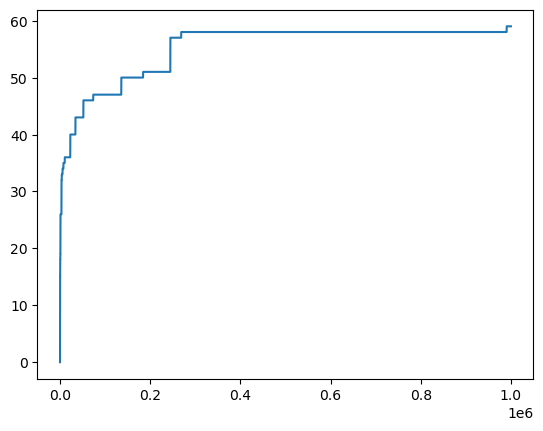

In [6]:
plt.plot(sum_draws)

C:\Users\Alex\AppData\Local\Temp\ipykernel_21124\3990578705.py:1: RuntimeWarning: invalid value encountered in scalar divide
  renormalized = [sum_draws[i]/np.log(i+1) for i in range(iter)]


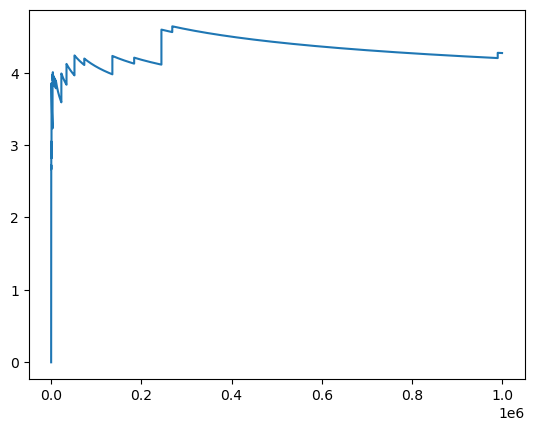

In [7]:
renormalized = [sum_draws[i]/np.log(i+1) for i in range(iter)]
plt.plot(renormalized)

# Experiences

In [8]:
nb_arms = 2
means = [1,0]
traj_length = 1000000
stds = [1, 1]
ucb_version = "ucb2"

In [9]:
Trajs = []
nb_traj = 15

for i in range(nb_traj):
    ag = agent.UCBBandit(nb_arms, ucb_version=ucb_version)
    bandit = env.GaussianBandit(nb_arms, means, stds, seed=None)
    sum_draws = [0]
    print(f"Iteration {i+1}", end="\r")

    for iter in range(traj_length):
        arm = ag.best_action()
        reward = bandit.play(arm)
        ag.observe(arm, reward)
        sum_draws.append(sum_draws[-1] + arm)

    Trajs.append(sum_draws)

    

In [10]:
Traj_loged = []
for traj in Trajs:
    Traj_loged.append([traj[i]/np.log(i+2) for i in range(len(traj))])

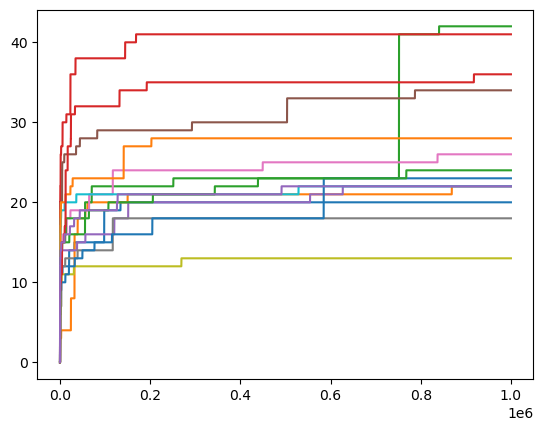

In [11]:
for traj in Trajs:
    plt.plot(traj)

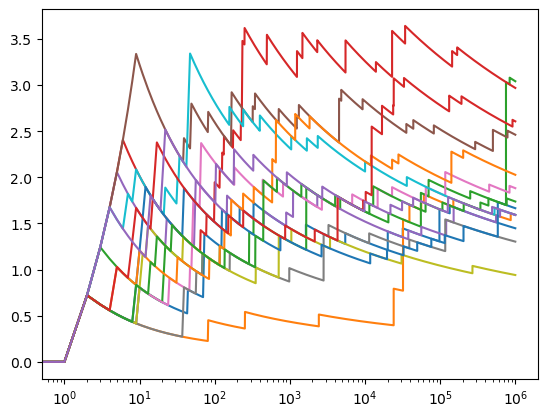

In [12]:
for trajl in Traj_loged:
    plt.plot(trajl)
plt.xscale("log")

### Compute average

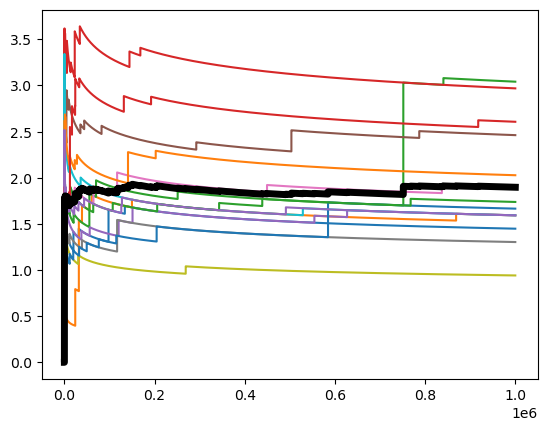

In [13]:
avg = []
for i in range(traj_length):
    avg_draws = np.mean([trajl[i] for trajl in Traj_loged])
    avg.append(avg_draws)

for trajl in Traj_loged:
    plt.plot(trajl)
plt.plot(avg, color="black", linewidth=5)

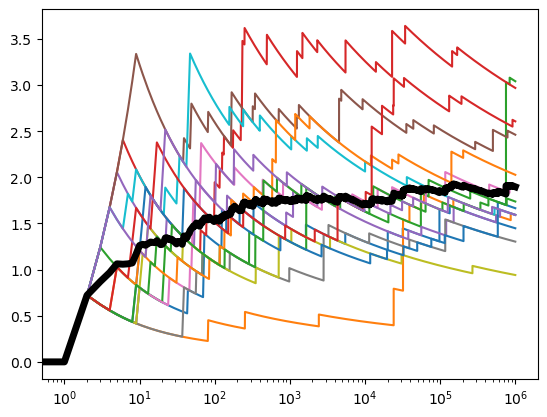

In [14]:
for trajl in Traj_loged:
    plt.plot(trajl)
plt.plot(avg, color="black", linewidth=5)
plt.xscale("log")

# Exp 3 bras

In [15]:
import agent
import env
from tools import generate_agents, generate_bandits, run_experiment, get_arm_proportion, get_arm_proportions_time
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Arm settings
nb_arms = 3
means = [1,0.5,0]
stds = [1,1,1]

bandit_version = "gaussian"
agent_version = "ucb"
ucb_version = "ucb2"

In [17]:
#Experience settings
nb_traj = 5000
length_traj = int(1e4)
seeds = None

In [18]:
bandits = generate_bandits(nb_traj, bandit_version, nb_arms, means, stds, seeds)
agents = generate_agents(nb_traj, agent_version, nb_arms, ucb_version)
run_experiment(bandits, agents, nb_traj, length_traj)
#Je peux me débarasser de l’historique

In [19]:
draws_proportions_end = get_arm_proportion(agents, True)
average = np.mean(draws_proportions_end, axis=0)

for i in range(nb_traj):
    print(f"\nExperience {i+1}:")
    for arm in range(nb_arms):
        print(f"\tArm {arm+1}: {draws_proportions_end[i][arm]}")
    print(f"\tRatio :{draws_proportions_end[i][1]/draws_proportions_end[i][2]}")

print("\nMeans")
for arm in range(nb_arms):
    print(f"\tArm {arm+1}: {average[arm]}")




Expérience 1:
	Arm 1: 1075.4217108129271
	Arm 2: 8.034447915210158
	Arm 3: 2.280046029992072
	Rapport :3.5238095238095237

Expérience 2:
	Arm 1: 1081.7189808005244
	Arm 2: 3.474355855226014
	Arm 3: 0.5428681023790647
	Rapport :6.4

Expérience 3:
	Arm 1: 1078.1360513248226
	Arm 2: 6.188696367121338
	Arm 3: 1.4114570661855683
	Rapport :4.384615384615384

Expérience 4:
	Arm 1: 1073.79310650579
	Arm 2: 9.120184119968288
	Arm 3: 2.8229141323711366
	Rapport :3.230769230769231

Expérience 5:
	Arm 1: 1076.181726156258
	Arm 2: 6.840138089976215
	Arm 3: 2.714340511895324
	Rapport :2.5199999999999996

Expérience 6:
	Arm 1: 1079.1132139091048
	Arm 2: 4.885812921411582
	Arm 3: 1.737177927613007
	Rapport :2.8125

Expérience 7:
	Arm 1: 1079.1132139091048
	Arm 2: 4.451518439508331
	Arm 3: 2.1714724095162588
	Rapport :2.0500000000000003

Expérience 8:
	Arm 1: 1075.2045635719755
	Arm 2: 9.2287577404441
	Arm 3: 1.3028834457097553
	Rapport :7.083333333333334

Expérience 9:
	Arm 1: 1078.1360513248226
	Arm

(array([  4.,  22.,  82., 287., 337., 402., 476., 761., 499., 449., 570.,
        291., 232., 243., 102.,  80.,  57.,  45.,  23.,  14.,  14.,   6.,
          3.,   0.]),
 array([-0.125,  0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,
         1.875,  2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,
         3.875,  4.125,  4.375,  4.625,  4.875,  5.125,  5.375,  5.625,
         5.875]),
 <BarContainer object of 24 artists>)

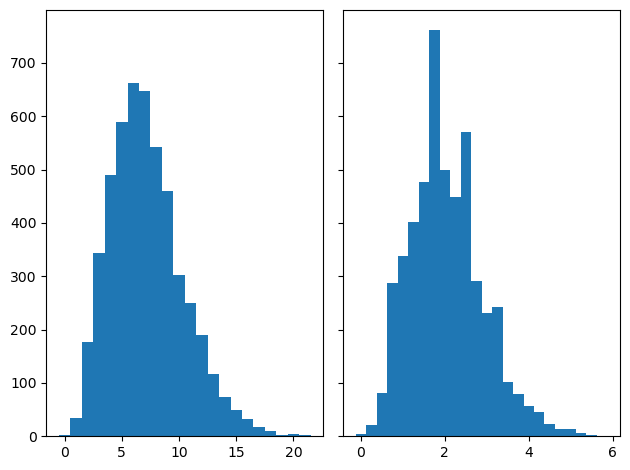

In [20]:
arm1 = [draws_proportions_end[i][1] for i in range(nb_traj)]
arm2 = [draws_proportions_end[i][2] for i in range(nb_traj)]
bins1 = [-0.5 + i for i in range(int(max(arm1) +1))]
bins2 = [-0.125 + 0.25*i for i in range(int(4*max(arm2) +1))]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(arm1,bins=bins1)
axs[1].hist(arm2, bins=bins2)